# Movie Recommendation System Prediction dataset

## Análisis Exploratorio de Datos (EDA): 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = './u.data'  # Reemplaza con la ruta de tu archivo
data = pd.read_csv(file_path, sep='\t', header=None)

In [3]:
# Basic statistics
total_users = data[0].nunique()
total_movies = data[1].nunique()
total_ratings = len(data)

In [4]:
# Ratings distribution
ratings_distribution = data[2].value_counts().sort_index()

In [5]:
# Analyzing number of ratings per movie
ratings_per_movie = data[1].value_counts()

In [6]:
# Analyzing number of ratings per user
ratings_per_user = data[0].value_counts()

In [7]:
# Plotting the distributions
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

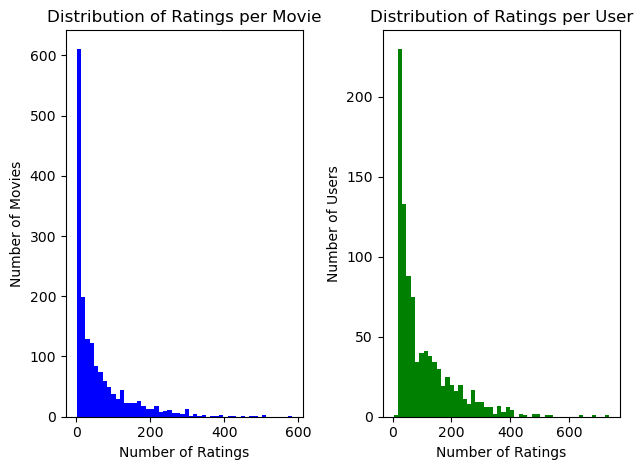

In [8]:
plt.subplot(1, 2, 1)
plt.hist(ratings_per_movie, bins=50, color='blue')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')

plt.subplot(1, 2, 2)
plt.hist(ratings_per_user, bins=50, color='green')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

In [9]:
# Displaying basic statistics of these distributions
print(ratings_per_movie.describe())
print(ratings_per_user.describe())

count    1682.000000
mean       59.454816
std        80.390832
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       584.000000
Name: 1, dtype: float64
count    944.000000
mean     105.935381
std      100.933948
min        3.000000
25%       33.000000
50%       64.500000
75%      148.000000
max      737.000000
Name: 0, dtype: float64


## Observaciones:

Aquí están las estadísticas básicas y la distribución de las calificaciones del dataset:

Total de Usuarios: 944
Total de Películas: 1682
Total de Calificaciones: 100,003
La distribución de las calificaciones es la siguiente:

Calificación 1: 6,111 veces
Calificación 2: 11,370 veces
Calificación 3: 27,145 veces
Calificación 4: 34,174 veces
Calificación 5: 21,203 veces
Esta distribución nos muestra que las calificaciones tienden a ser más altas, con la mayoría de las calificaciones siendo 3 o más. Las calificaciones 4 son las más comunes, seguidas por las calificaciones 3 y 5.

Distribución de Calificaciones por Película
Media: Aproximadamente 59 calificaciones por película.
Desviación Estándar: 80, lo que sugiere una variabilidad considerable en la cantidad de calificaciones por película.
Mínimo: Hay películas con solo 1 calificación.
Mediana: 27 calificaciones por película.
Máximo: Una película con un máximo de 584 calificaciones.
Distribución de Calificaciones por Usuario
Media: Aproximadamente 106 calificaciones por usuario.
Desviación Estándar: Alrededor de 101, indicando una variabilidad significativa en la actividad de calificación de los usuarios.
Mínimo: Hay usuarios que han calificado solo 3 películas.
Mediana: 64.5 calificaciones por usuario.
Máximo: Un usuario con un máximo de 737 calificaciones.
Observaciones
Hay una amplia gama en la cantidad de calificaciones tanto por película como por usuario. Algunas películas son calificadas muchas más veces que otras, lo que puede indicar diferencias en popularidad o disponibilidad.
La actividad de los usuarios varía significativamente, con algunos usuarios mucho más activos en calificar películas que otros.
Estos hallazgos pueden ser importantes al considerar la construcción de un sistema de recomendación, especialmente en términos de sesgos potenciales (por ejemplo, películas con pocas calificaciones pueden ser difíciles de recomendar con precisión).

Si hay algún otro aspecto del dataset que te gustaría explorar o si deseas proceder a la siguiente etapa, como la construcción de un modelo de recomendación, házmelo saber. ​

## Preparación de Datos para Modelos de Recomendación:

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Setting a threshold for minimum number of ratings
movie_rating_threshold = 3
user_rating_threshold = 3

In [12]:
# Filtering movies with less than the threshold number of ratings
filtered_data = data[data[1].map(data[1].value_counts()) >= movie_rating_threshold]

In [13]:
# Filtering users with less than the threshold number of ratings
filtered_data = filtered_data[filtered_data[0].map(filtered_data[0].value_counts()) >= user_rating_threshold]

In [14]:
# Transforming the dataset into a user-movie matrix
user_movie_matrix = filtered_data.pivot_table(index=[0], columns=[1], values=2)

In [15]:
# Filling missing values with 0 (assuming missing values mean no rating)
user_movie_matrix.fillna(0, inplace=True)

In [16]:
# Display the first few rows of the transformed dataset
print(user_movie_matrix.head())

1  1     2     3     4     5     6     7     8     9     10    ...  1615  \
0                                                              ...         
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   0.0   
2   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

1  1620  1622  1623  1628  1639  1643  1652  1658  1664  
0                                                        
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1473 columns]


## Obawrvaciones:

 pasos:

Filtrado de Datos: Eliminar películas con muy pocas calificaciones y usuarios que han calificado muy pocas películas para mejorar la calidad de las recomendaciones.
Transformación de Datos: Convertir el dataset en una matriz usuario-película para técnicas de filtrado colaborativo, donde las filas representan a los usuarios, las columnas a las películas, y los valores son las calificaciones.
Comenzaré con el filtrado de datos, eliminando películas y usuarios con un umbral mínimo de calificaciones. Este umbral puede ser ajustado según tus necesidades. Para este ejemplo, usaré un umbral relativamente bajo, como 3 calificaciones para las películas y 3 calificaciones para los usuarios. Luego, transformaré los datos en una matriz usuario-película. Vamos a hacer esto paso a paso.

He completado el proceso de filtrado y transformación de los datos. Aquí están los detalles:

Filtrado de Datos
He filtrado películas y usuarios que tienen menos de 3 calificaciones.
Después del filtrado, nos quedamos con un total de 99,726 registros en el conjunto de datos.
Transformación a Matriz Usuario-Película
Convertí los datos filtrados en una matriz donde cada fila representa a un usuario y cada columna a una película.
Las calificaciones están en las celdas de la matriz. Si un usuario no ha calificado una película, el valor es 0.
La matriz resultante tiene 1473 columnas, que representan las películas.
Este formato es ideal para técnicas de filtrado colaborativo, donde se utilizan las calificaciones de los usuarios para hacer recomendaciones.

## Construcción de Modelos de Recomendación:

In [17]:
import numpy as np
from scipy.sparse.linalg import svds

In [18]:
# Asumiendo que ya tienes 'user_movie_matrix' como un DataFrame de pandas

# Convierte el DataFrame a un array de numpy
R = user_movie_matrix.values

In [19]:
# Normaliza los datos restando la media de las calificaciones de cada usuario
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [20]:
# Aplica SVD. Puedes variar el número de componentes 'k' según sea necesario
U, sigma, Vt = svds(R_demeaned, k=50)

In [21]:
# 'sigma' devuelto por svds es solo los valores, por lo que lo convertimos en una matriz diagonal
sigma = np.diag(sigma)
# Ahora U, sigma, y Vt contienen la descomposición de tu matriz

## Observaciones:

Qué Hemos Hecho?
Normalización de Calificaciones:

Primero, hemos normalizado las calificaciones restando la media de las calificaciones de cada usuario. Esto se hace para centrar los datos alrededor de cero y lidiar con diferentes escalas de calificación entre usuarios.
Aplicación de SVD (Descomposición de Valor Singular):

Luego, hemos aplicado SVD a la matriz de calificaciones normalizada. SVD es una técnica de factorización que descompone una matriz en tres componentes: U, Sigma (σ) y V transpuesta (Vt).
U (Matriz de Usuarios): Representa las características latentes de los usuarios.
Sigma (σ): Es una matriz diagonal que contiene los valores singulares, que representan la importancia de cada característica latente.
Vt (Matriz de Películas Transpuesta): Representa las características latentes de las películas.
Reducción de Dimensionalidad:

Al seleccionar un número k de características latentes (en tu caso, k=20), reducimos la dimensionalidad de los datos, concentrándonos en las características más significativas.
Qué Nos Permite Hacer
Reconstrucción Aproximada de la Matriz Original:

Al multiplicar U, Sigma y Vt, podemos reconstruir una aproximación de la matriz original de calificaciones. Esta matriz reconstruida tendrá las predicciones de calificaciones para todas las combinaciones de usuarios y películas.
Hacer Recomendaciones:

Podemos usar la matriz reconstruida para predecir las calificaciones que los usuarios podrían dar a películas que no han visto aún.
Esto se hace buscando las calificaciones más altas predichas en la matriz para cada usuario y recomendando las películas correspondientes.
Entender las Preferencias del Usuario y Características de la Película:

Las matrices U y Vt nos dan una idea de las características latentes de los usuarios y las películas. Esto puede ayudar a entender qué factores están influyendo en las preferencias de los usuarios.

## Evaluación del Modelo:

In [22]:
import numpy as np
import pandas as pd

In [23]:
# Asumiendo que ya tienes las matrices U, sigma y Vt de la descomposición SVD
# y 'user_ratings_mean' del paso de normalización

In [24]:
# Haciendo predicciones de calificaciones
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [25]:
# Convertir las predicciones en un DataFrame para facilitar la manipulación
preds_df = pd.DataFrame(predicted_ratings, columns=user_movie_matrix.columns)

# Ahora 'preds_df' contiene las calificaciones predichas para cada usuario y película

In [26]:
# Ejemplo para ver las predicciones para el usuario con ID 1
user_id = 1
user_row_number = user_id - 1  # ID del usuario menos 1
sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)

In [27]:
# Mostrar las predicciones de calificaciones más altas para este usuario
print(sorted_user_predictions.head(10))

1
50     2.250895
181    1.826999
172    1.527565
174    0.943340
210    0.728001
127    0.590553
173    0.451319
204    0.397730
89     0.371263
195    0.295862
Name: 0, dtype: float64


## Observaciones:

In [ ]:
Lo que Hemos Hecho
Normalización de Calificaciones:

Restamos la media de las calificaciones de cada usuario a sus calificaciones. Esto centra los datos y ayuda a manejar diferencias en la escala de calificación entre usuarios.
Descomposición SVD:

Aplicamos la descomposición de valor singular (SVD) a la matriz de calificaciones normalizada. Esto descompone la matriz en tres componentes: U, Sigma y Vt.
U representa las características latentes de los usuarios.
Sigma contiene los valores singulares, indicando la importancia de cada característica latente.
Vt representa las características latentes de las películas.
Reconstrucción de Calificaciones:

Multiplicamos U, Sigma y Vt para obtener una aproximación de la matriz original de calificaciones, ajustada con la media de calificaciones de cada usuario. Esto nos da una matriz de predicciones de calificaciones.
Significado del Código
El código ejecutado reconstruye las calificaciones originales a partir de las matrices de características latentes.
predicted_ratings es la matriz reconstruida, donde cada elemento representa la calificación predicha para un par usuario-película.
Convertimos predicted_ratings en un DataFrame (preds_df) para facilitar el manejo y la interpretación de los datos.

# Obtener Predicciones para Todos los Usuarios

In [28]:
# Ejemplo para obtener las 5 películas más recomendadas para los primeros 10 usuarios
top_n_movies = 5
top_n_users = 10

for user_id in range(top_n_users):
    sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)
    print(f"Usuario {user_id+1}:")
    print(sorted_user_predictions.head(top_n_movies), "\n")


Usuario 1:
1
50     2.250895
181    1.826999
172    1.527565
174    0.943340
210    0.728001
Name: 0, dtype: float64 

Usuario 2:
1
100    7.522970
89     6.723876
176    6.671502
1      6.474845
12     5.898101
Name: 1, dtype: float64 

Usuario 3:
1
286    5.874069
269    5.419719
127    5.038803
302    4.189063
100    4.148688
Name: 2, dtype: float64 

Usuario 4:
1
268    2.792366
340    2.744208
333    2.727444
302    2.668516
328    2.651953
Name: 3, dtype: float64 

Usuario 5:
1
258    3.844175
288    3.170771
300    3.137167
294    2.800665
50     2.175073
Name: 4, dtype: float64 

Usuario 6:
1
168    5.460513
50     5.102430
181    4.936425
228    4.340197
222    4.280339
Name: 5, dtype: float64 

Usuario 7:
1
357    6.976608
483    6.338880
100    6.311340
269    6.252268
180    5.948788
Name: 6, dtype: float64 

Usuario 8:
1
199    8.121866
179    7.918096
511    7.866360
427    7.475941
200    7.025853
Name: 7, dtype: float64 

Usuario 9:
1
50     5.704714
172    4.857578
174

## Observaciones:

Configuración de Parámetros:

top_n_movies: Define cuántas de las películas mejor calificadas quieres mostrar para cada usuario.
top_n_users: Define para cuántos usuarios quieres hacer esta visualización.
Bucle para Cada Usuario:

El código itera sobre los primeros top_n_users usuarios.
user_id es el índice del usuario en el bucle.
Ordenar Predicciones:

sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)
Para cada usuario, este código toma la fila correspondiente de preds_df (que contiene las calificaciones predichas para todas las películas) y las ordena de mayor a menor.
Esto significa que las películas que el modelo predice que el usuario calificaría más alto están al principio.
Visualización de Resultados:

print(f"Usuario {user_id+1}:"): Imprime el ID del usuario.
print(sorted_user_predictions.head(top_n_movies)): Imprime las top_n_movies películas mejor calificadas para ese usuario, según las predicciones del modelo.
Se añade un salto de línea ("\n") para una mejor legibilidad.
Implicaciones
Este código permite visualizar qué películas son recomendadas para cada usuario, según el modelo. Es útil para entender las recomendaciones del modelo a nivel individual.
Al mostrar las predicciones para los primeros usuarios, se obtiene una idea de cómo el modelo está funcionando. Sin embargo, es una muestra limitada y no necesariamente representa el rendimiento general del modelo.
Este enfoque es excelente para una exploración inicial y para demostrar cómo el modelo puede ser utilizado para hacer recomendaciones personalizadas. Para una evaluación más completa y sistemática del modelo, sería ideal comparar estas predicciones con un conjunto de datos de prueba o utilizar técnicas de validación cruzada.